<a href="https://www.kaggle.com/code/mohammadhaqbani/salary-data-analysis?scriptVersionId=135718207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.imgbly.com/ib/CMdjPsCYDZ"><img src="https://www.imgbly.com/ib/CMdjPsCYDZ.png" alt="CMdjPsCYDZ"/></a>

In [1]:
# Importing the required libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

# Printing the first few rows of the dataset
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
# Checking for missing values
print(df.isnull().sum())


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [3]:
df = df.dropna()
print(df.isnull().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [4]:
# Checking for duplicates
print(df.duplicated().sum())

4911


In [5]:
# Drop the duplicate rows
df = df.drop_duplicates()

# Check the number of duplicates again to confirm they were removed
print(df.duplicated().sum())


0


In [6]:
# Checking data types
print(df.dtypes)


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [7]:
print(df.describe())


               Age  Years of Experience         Salary
count  1787.000000          1787.000000    1787.000000
mean     35.139899             9.156128  113184.659765
std       8.213045             6.844924   51596.536766
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [8]:
# Define a dictionary to map current values to new standardized values
education_map = {
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "PhD": "PhD",
    "Bachelor's": "Bachelor's",
    "Master's": "Master's",
    "High School": "High School",
    "phD": "PhD"
}

# Use the map to replace the values
df['Education Level'] = df['Education Level'].replace(education_map)

# Verify the changes
print(df['Education Level'].value_counts())


Bachelor's     768
Master's       568
PhD            341
High School    110
Name: Education Level, dtype: int64


In [9]:
print(df['Gender'].value_counts())
print(df['Education Level'].value_counts())
print(df['Job Title'].value_counts())


Male      966
Female    814
Other       7
Name: Gender, dtype: int64
Bachelor's     768
Master's       568
PhD            341
High School    110
Name: Education Level, dtype: int64
Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Financial Advisor              1
Junior Designer                1
Chief Technology Officer       1
Technical Recruiter            1
Delivery Driver                1
Name: Job Title, Length: 191, dtype: int64


In [10]:
# Define a list of classifications
classifications = ['Engineer', 'Analyst', 'Manager', 'Associate', 'Director', 'Coordinator', 'Scientist', 'Developer']

# Create a new column 'Job Classification' initialized with 'Other'
df['Job Classification'] = 'Other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
for classification in classifications:
    df.loc[df['Job Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

# Verify the changes
print(df['Job Classification'].value_counts())


Manager        475
Engineer       406
Developer      239
Other          186
Analyst        127
Scientist      119
Director       117
Coordinator     72
Associate       46
Name: Job Classification, dtype: int64


In [11]:
# Define a list of classifications
classifications = ['Engineer', 'Analyst', 'Associate', 'Director', 
                   'Coordinator', 'Scientist', 'Developer', 'Representative',
                   'Clerk', 'Rep', 'Support', 'Specialist', 'Consultant', 
                   'Designer', 'Writer', 'Generalist', 'Researcher', 
                   'Accountant', 'Recruiter', 'Officer', 'Advisor', 
                   'Producer', 'Copywriter']  # 'Manager' removed

# Create a new column 'Job Classification' initialized with 'Other'
df['Job Classification'] = 'Other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
for classification in classifications:
    df.loc[df['Job Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

# Titles like 'CEO', 'VP', 'Executive', and 'Man' to be classified as 'Executive'
executives = ['CEO', 'VP', 'Executive', 'Man']
for executive in executives:
    df.loc[df['Job Title'].str.contains(executive, case=False, na=False), 'Job Classification'] = 'Executive' 

# Classify 'Manager'
df.loc[df['Job Title'].str.contains('Manager', case=False, na=False), 'Job Classification'] = 'Manager'

# Verify the changes
print(df['Job Classification'].value_counts())


Manager        475
Engineer       406
Developer      239
Analyst        127
Scientist      119
Director       112
Coordinator     60
Associate       46
Rep             43
Generalist      41
Executive       39
Designer        26
Specialist      20
Other            7
Accountant       6
Advisor          4
Recruiter        4
Consultant       3
Copywriter       2
Researcher       2
Officer          2
Writer           1
Support          1
Clerk            1
Producer         1
Name: Job Classification, dtype: int64


<a href="https://www.imgbly.com/ib/lkqRnIPNq9"><img src="https://www.imgbly.com/ib/lkqRnIPNq9.png" alt="lkqRnIPNq9"/></a>

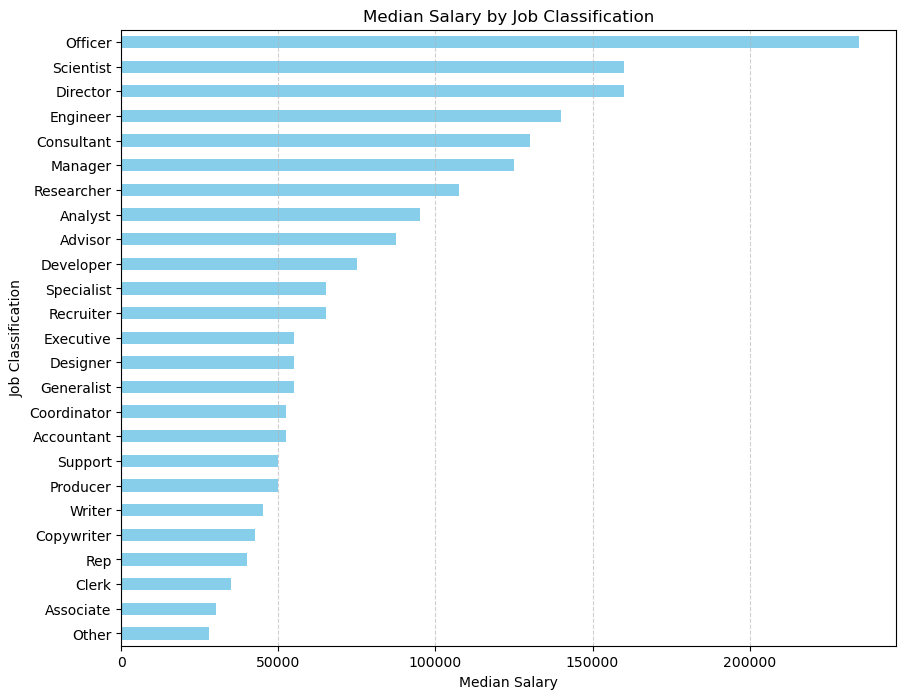

In [12]:
import matplotlib.pyplot as plt

# Calculate median salary for each classification
median_salaries = df.groupby('Job Classification')['Salary'].median().sort_values()

# Plot the median salaries
plt.figure(figsize=(10, 8))
median_salaries.plot(kind='barh', color='skyblue')
plt.xlabel('Median Salary')
plt.ylabel('Job Classification')
plt.title('Median Salary by Job Classification')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


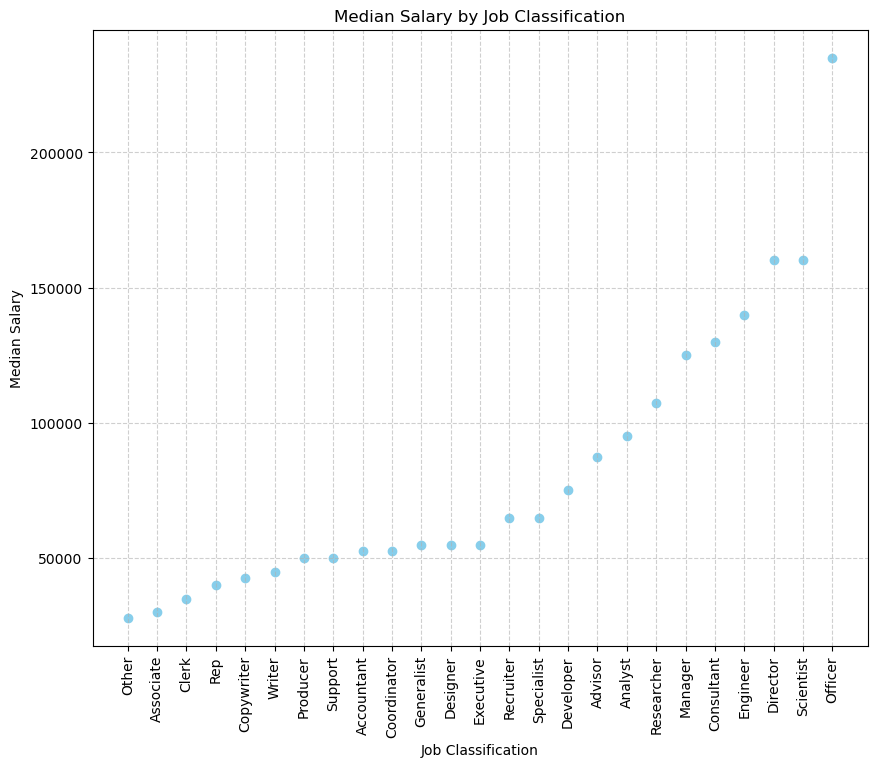

In [13]:
import numpy as np

# Calculate median salary for each classification
median_salaries = df.groupby('Job Classification')['Salary'].median().sort_values()

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(median_salaries.index, median_salaries, color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Job Classification')
plt.ylabel('Median Salary')
plt.title('Median Salary by Job Classification')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [14]:
# Define a dictionary for the new classification
classification_dict = {
    'Engineer': ['Engineer'],
    'Administrative': ['Other', 'Associate', 'Clerk', 'Rep', 'Copywriter', 'Producer', 'Support', 'Coordinator'],
    'Specialist and Senior Specialist': ['Accountant', 'Generalist', 'Designer', 'Executive', 'Recruiter', 'Developer'],
    'Research & Advisory': ['Advisor', 'Analyst', 'Researcher', 'Consultant', 'Scientist'],
    'Managers': ['Manager'],
    'Executive': ['Director', 'Officer']
}

# Create a new column 'Job Classification 2' initialized with 'Other'
df['Job Classification 2'] = 'Other'

# Loop through the dictionary and assign new classifications
for new_classification, old_classifications in classification_dict.items():
    for old_classification in old_classifications:
        df.loc[df['Job Classification'] == old_classification, 'Job Classification 2'] = new_classification

# Verify the changes
print(df['Job Classification 2'].value_counts())


Managers                            475
Engineer                            406
Specialist and Senior Specialist    355
Research & Advisory                 255
Administrative                      161
Executive                           114
Other                                21
Name: Job Classification 2, dtype: int64


<a href="https://www.imgbly.com/ib/jglcH73GKe"><img src="https://www.imgbly.com/ib/jglcH73GKe.png" alt="jglcH73GKe"/></a>

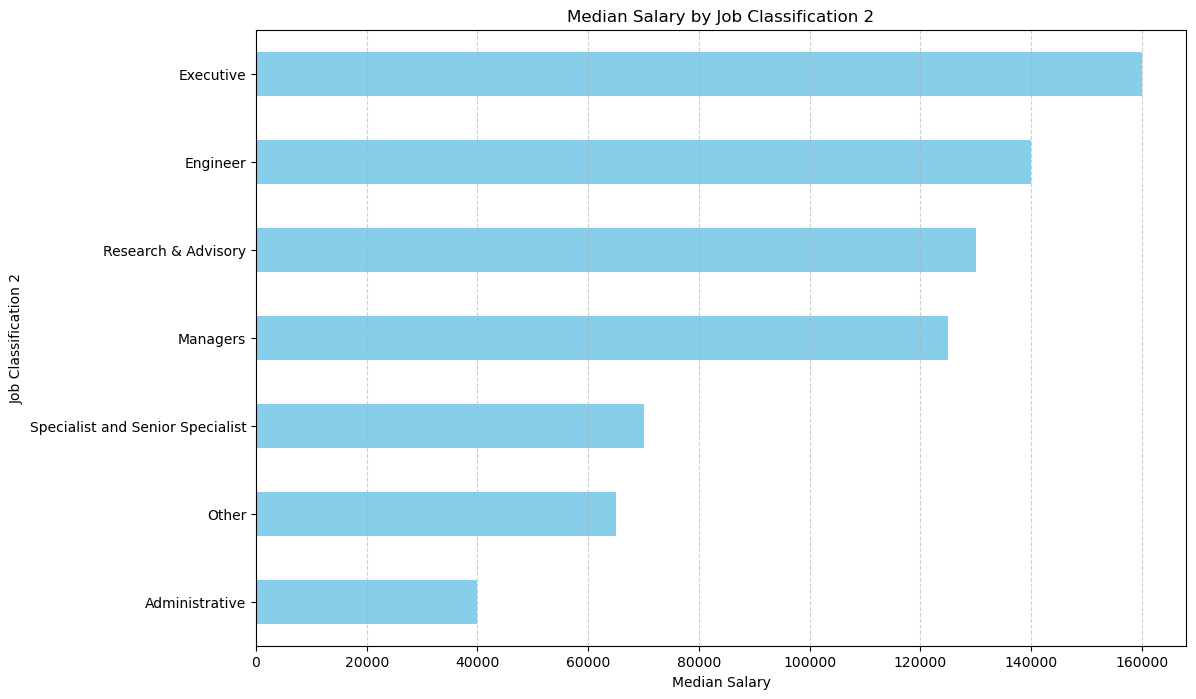

In [15]:
# Calculate median salary for each new classification
median_salaries = df.groupby('Job Classification 2')['Salary'].median().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
median_salaries.plot(kind='barh', color='skyblue')
plt.xlabel('Median Salary')
plt.ylabel('Job Classification 2')
plt.title('Median Salary by Job Classification 2')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [16]:
# Calculate max salary for each classification
max_salaries = df.groupby('Job Classification 2')['Salary'].max()

# Calculate min salary for each classification
min_salaries = df.groupby('Job Classification 2')['Salary'].min()

# Calculate the range of salary for each classification
salary_ranges = max_salaries - min_salaries

# Print the salary ranges
print(salary_ranges)


Job Classification 2
Administrative                      130500.0
Engineer                            170000.0
Executive                           180000.0
Managers                            249421.0
Other                               105000.0
Research & Advisory                 239650.0
Specialist and Senior Specialist    249450.0
Name: Salary, dtype: float64


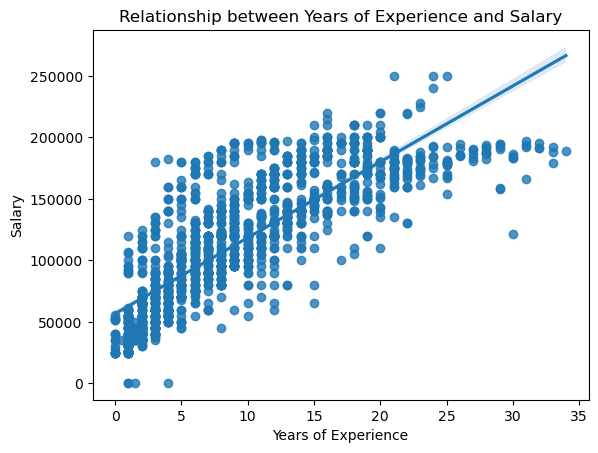

Correlation between Years of Experience and Salary:  0.818724842566649


In [17]:
#relationship between years of experience and salary

import seaborn as sns

sns.regplot(x='Years of Experience', y='Salary', data=df)
plt.title('Relationship between Years of Experience and Salary')
plt.show()

correlation = df['Years of Experience'].corr(df['Salary'])
print('Correlation between Years of Experience and Salary: ', correlation)


<a href="https://www.imgbly.com/ib/muh6EUVrtW"><img src="https://www.imgbly.com/ib/muh6EUVrtW.png" alt="muh6EUVrtW"/></a>

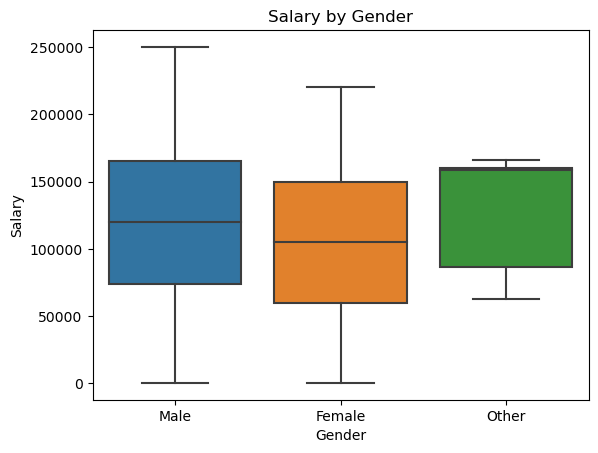

In [18]:

sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.show()


In [19]:
average_salaries_by_gender = df.groupby('Gender')['Salary'].mean()
print(average_salaries_by_gender)


Gender
Female    107294.798526
Male      118056.198758
Other     125819.000000
Name: Salary, dtype: float64


<a href="https://www.imgbly.com/ib/JvMtCfbCkT"><img src="https://www.imgbly.com/ib/JvMtCfbCkT.png" alt="JvMtCfbCkT"/></a>

In [20]:
# Group by 'Job Classification 2' and 'Gender' and count the size of each group
gender_counts = df.groupby(['Job Classification 2', 'Gender']).size()

# Reset the index of gender_counts so that 'Job Classification 2', 'Gender' 
# and the count are columns in a DataFrame
gender_counts = gender_counts.reset_index(name='Count')

# Find out which gender has the highest count in each job classification
dominant_genders = gender_counts.groupby('Job Classification 2')['Count'].idxmax()

# Use the indices of the highest counts to get the corresponding rows from gender_counts
dominant_genders = gender_counts.loc[dominant_genders]

print(dominant_genders)


                Job Classification 2  Gender  Count
0                     Administrative  Female    101
3                           Engineer    Male    231
6                          Executive    Male     65
8                           Managers    Male    248
9                              Other  Female     12
12               Research & Advisory    Male    160
14  Specialist and Senior Specialist    Male    193


In [21]:
# Group by 'Job Classification 2' and 'Gender' and calculate the average salary
average_salaries = df.groupby(['Job Classification 2', 'Gender'])['Salary'].mean()

# Reset the index of average_salaries so that 'Job Classification 2', 'Gender' 
# and the average salary are columns in a DataFrame
average_salaries = average_salaries.reset_index(name='Average Salary')

print(average_salaries)


                Job Classification 2  Gender  Average Salary
0                     Administrative  Female    49529.702970
1                     Administrative    Male    45700.000000
2                           Engineer  Female   131057.982353
3                           Engineer    Male   138137.259740
4                           Engineer   Other   142750.800000
5                          Executive  Female   143571.428571
6                          Executive    Male   153769.230769
7                           Managers  Female   126655.797357
8                           Managers    Male   130309.790323
9                              Other  Female    67916.666667
10                             Other    Male    68888.888889
11               Research & Advisory  Female   124168.421053
12               Research & Advisory    Male   124764.687500
13  Specialist and Senior Specialist  Female    72867.143750
14  Specialist and Senior Specialist    Male    85473.590674
15  Specialist and Senio

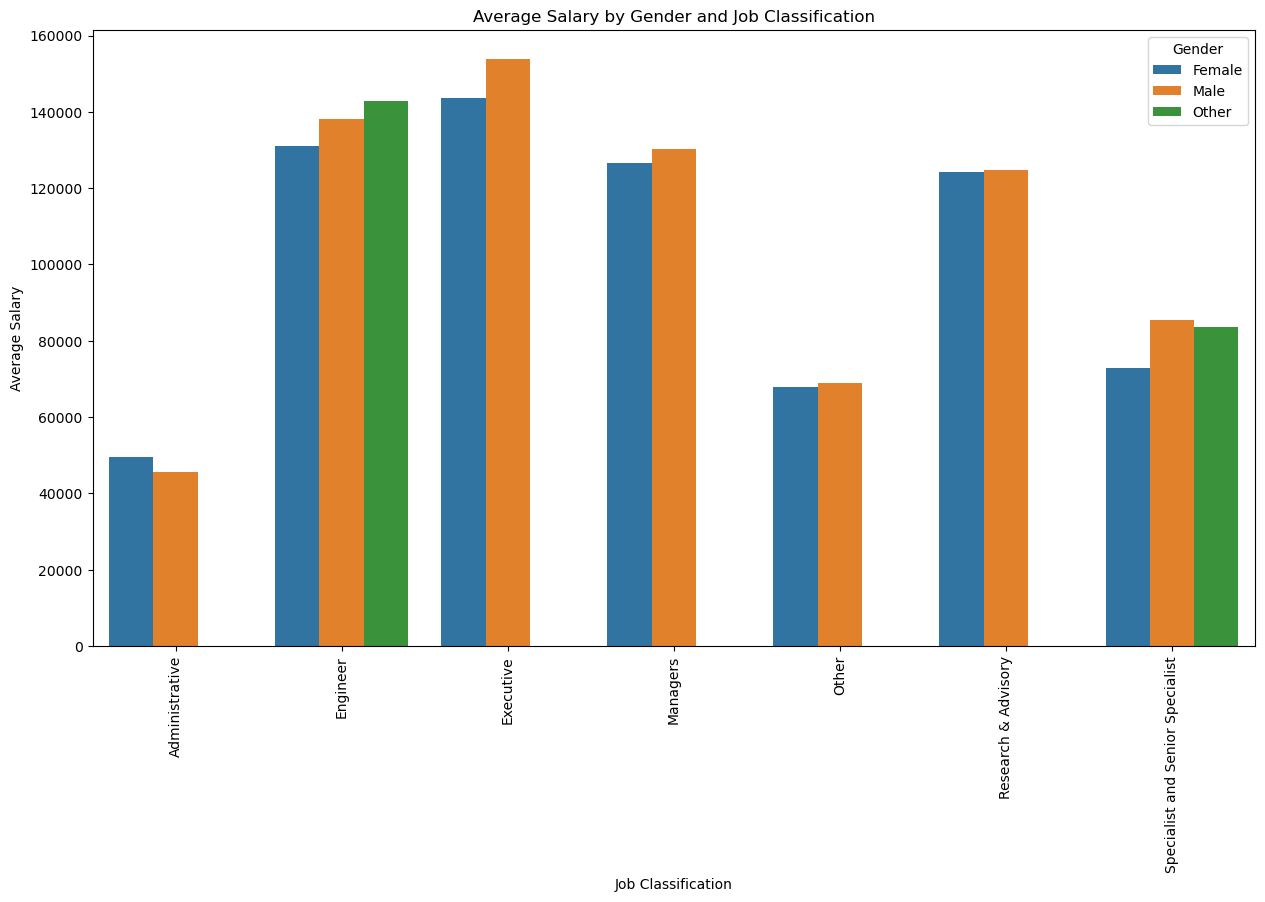

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Job Classification 2', y='Average Salary', hue='Gender', data=average_salaries)
plt.title('Average Salary by Gender and Job Classification')
plt.xlabel('Job Classification')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


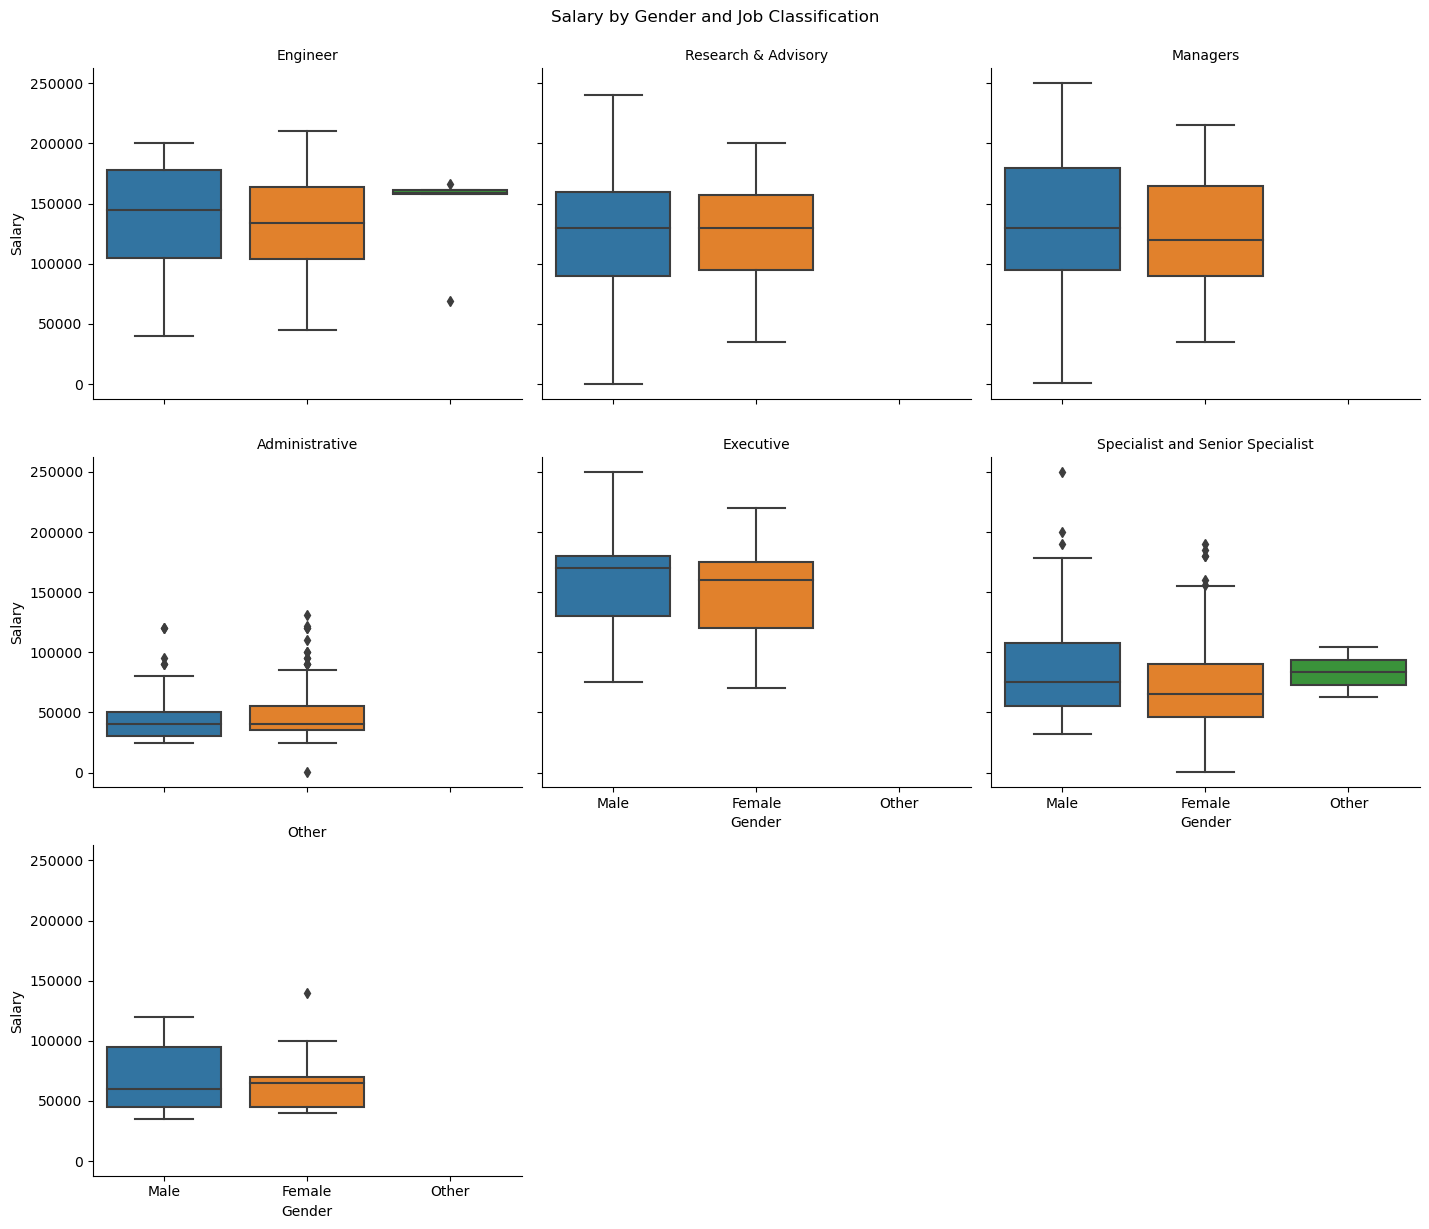

In [23]:

# Create a categorical scatterplot for each job classification
g = sns.catplot(x='Gender', y='Salary', col='Job Classification 2', 
                data=df, kind='box', col_wrap=3, height=4, aspect=1.2)

# Set the titles for each subplot
g.set_titles('{col_name}')

# Set the y-axis label
g.set_ylabels('Salary')

# Set the x-axis label
g.set_xlabels('Gender')

# Set the overall title
plt.suptitle('Salary by Gender and Job Classification', y=1.02)

plt.show()